## 实例22：交叉熵实验
* softmax_cross_entropy_with_logits
* -tf.reduce_sum(labels * tf.log(tf.nn.softxmax(logits)), 1)

In [1]:
# -*- coding: utf-8 -*-
import tensorflow as tf


labels = [[0,0,1],[0,1,0]]
logits = [[2,  0.5,6],
          [0.1,0,  3]]
logits_scaled = tf.nn.softmax(logits)
logits_scaled2 = tf.nn.softmax(logits_scaled)


result1 = tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=logits)
result2 = tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=logits_scaled)
result3 = -tf.reduce_sum(labels*tf.log(logits_scaled),1)


with tf.Session() as sess:
    print ("scaled=",sess.run(logits_scaled))    
    print ("scaled2=",sess.run(logits_scaled2)) #经过第二次的softmax后，分布概率会有变化
    

    print ("rel1=",sess.run(result1),"\n")#正确的方式
    print ("rel2=",sess.run(result2),"\n")#如果将softmax变换完的值放进去会，就相当于算第二次softmax的loss，所以会出错
    print ("rel3=",sess.run(result3))

C:\Users\adward\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

scaled= [[0.01791432 0.00399722 0.97808844]
 [0.04980332 0.04506391 0.90513283]]
scaled2= [[0.21747023 0.21446465 0.56806517]
 [0.2300214  0.22893383 0.5410447 ]]
rel1= [0.02215516 3.0996735 ] 

rel2= [0.56551915 1.4743223 ] 

rel3= [0.02215518 3.0996735 ]


## 实例23： one_hot实验

In [2]:
#标签总概率为1
labels = [[0.4,0.1,0.5],[0.3,0.6,0.1]]
result4 = tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=logits)
with tf.Session() as sess:
    print ("rel4=",sess.run(result4),"\n") 

rel4= [2.1721554 2.7696736] 



## 实例24：sparse交叉熵的使用

In [3]:
#sparse
labels = [2,1] #其实是0 1 2 三个类。等价 第一行 001 第二行 010
result5 = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=labels, logits=logits)
with tf.Session() as sess:
    print ("rel5=",sess.run(result5),"\n")

rel5= [0.02215516 3.0996735 ] 



## 实例25：计算loss值
tf.reduce_mean(-tf.reduce_sum(labels * tf.log(logits_scaled),1) ) = tf.reduce_mean(result1)

In [4]:
#注意！！！这个函数的返回值并不是一个数，而是一个向量，
#如果要求交叉熵loss，我们要对向量求均值，
#就是对向量再做一步tf.reduce_mean操作    
loss=tf.reduce_mean(result1)
with tf.Session() as sess:
    print ("loss=",sess.run(loss))

loss= 1.5609143


In [5]:
labels = [[0,0,1],[0,1,0]]    
loss2 = tf.reduce_mean(-tf.reduce_sum(labels * tf.log(logits_scaled),1) )
with tf.Session() as sess:
    print ("loss2=",sess.run(loss2))

loss2= 1.5609144


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting H:/tensorflow_projects/chap6/MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting H:/tensorflow_projects/chap6/MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting H:/tensorflow_projects/chap6/MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting H:/tensorflow_projects/chap6/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
输入数据: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
输入数据

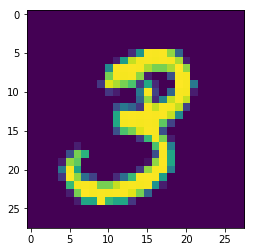

输入数据打shape: (10000, 784)
输入数据打shape: (5000, 784)
Epoch: 0001 cost= 8.143192529
Epoch: 0002 cost= 4.322669148
Epoch: 0003 cost= 2.981214518
Epoch: 0004 cost= 2.356783852
Epoch: 0005 cost= 1.998906395
Epoch: 0006 cost= 1.765469893
Epoch: 0007 cost= 1.600443805
Epoch: 0008 cost= 1.477601487
Epoch: 0009 cost= 1.381630285
Epoch: 0010 cost= 1.305191407
Epoch: 0011 cost= 1.241832566
Epoch: 0012 cost= 1.188988984
Epoch: 0013 cost= 1.143483993
Epoch: 0014 cost= 1.104311068
Epoch: 0015 cost= 1.069696186
Epoch: 0016 cost= 1.039322816
Epoch: 0017 cost= 1.012039655
Epoch: 0018 cost= 0.987467080
Epoch: 0019 cost= 0.965332884
Epoch: 0020 cost= 0.945004881
Epoch: 0021 cost= 0.926361536
Epoch: 0022 cost= 0.909262278
Epoch: 0023 cost= 0.893383189
Epoch: 0024 cost= 0.878501318
Epoch: 0025 cost= 0.864673607
 Finished!


In [9]:
# -*- coding: utf-8 -*-
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("H:/tensorflow_projects/chap6/MNIST_data/")

print ('输入数据:',mnist.train.images)
print ('输入数据打shape:',mnist.train.images.shape)

import pylab 
im = mnist.train.images[1]
im = im.reshape(-1,28)
pylab.imshow(im)
pylab.show()


print ('输入数据打shape:',mnist.test.images.shape)
print ('输入数据打shape:',mnist.validation.images.shape)


import tensorflow as tf #导入tensorflow库

tf.reset_default_graph()
# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784]) # mnist data维度 28*28=784
y = tf.placeholder(tf.int32, [None]) # 0-9 数字=> 10 classes

# Set model weights
W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.zeros([10]))

z= tf.matmul(x, W) + b
# 构建模型
pred = tf.nn.softmax(z) # Softmax分类

# Minimize error using cross entropy
#cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
cost = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=z))
#参数设置
learning_rate = 0.01
# 使用梯度下降优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

training_epochs = 25
batch_size = 100
display_step = 1


# 启动session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())# Initializing OP

    # 启动循环开始训练
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # 遍历全部数据集
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs,
                                                          y: batch_ys})
            # Compute average loss
            avg_cost += c / total_batch
        # 显示训练中的详细信息
        if (epoch+1) % display_step == 0:
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))

    print( " Finished!")

## 实例26 学习率衰减

In [7]:
# -*- coding: utf-8 -*-
import tensorflow as tf

global_step = tf.Variable(0, trainable=False)

initial_learning_rate = 0.1 #初始学习率

learning_rate = tf.train.exponential_decay(initial_learning_rate,
                                           global_step,
                                           decay_steps=10,decay_rate=0.9)
opt = tf.train.GradientDescentOptimizer(learning_rate)

add_global = global_step.assign_add(1)
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    print(sess.run(learning_rate))
    for i in range(20):
        g, rate = sess.run([add_global, learning_rate])
        print(g,rate)


Instructions for updating:
Colocations handled automatically by placer.
0.1
1 0.1
2 0.09791484
3 0.09688862
4 0.095873155
5 0.094868325
6 0.09387404
7 0.092890166
8 0.09191661
9 0.09095325
10 0.089999996
11 0.08905673
12 0.088123344
13 0.08719975
14 0.08628584
15 0.0853815
16 0.084486626
17 0.08360115
18 0.08272495
19 0.08185792
20 0.08099999


## 实例27：·Maxout网络实现mnist分类.py

Extracting H:/tensorflow_projects/chap6/MNIST_data/train-images-idx3-ubyte.gz
Extracting H:/tensorflow_projects/chap6/MNIST_data/train-labels-idx1-ubyte.gz
Extracting H:/tensorflow_projects/chap6/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting H:/tensorflow_projects/chap6/MNIST_data/t10k-labels-idx1-ubyte.gz
输入数据: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
输入数据打shape: (55000, 784)


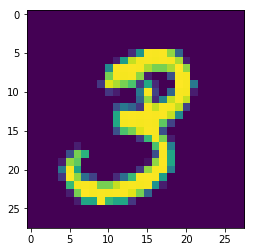

输入数据打shape: (10000, 784)
输入数据打shape: (5000, 784)
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch: 0001 cost= 1.669748494
Epoch: 0002 cost= 0.819802765
Epoch: 0003 cost= 0.668256996
Epoch: 0004 cost= 0.599882030
Epoch: 0005 cost= 0.551539327
Epoch: 0006 cost= 0.519114701
Epoch: 0007 cost= 0.501650673
Epoch: 0008 cost= 0.480439953
Epoch: 0009 cost= 0.465431287
Epoch: 0010 cost= 0.454214447
Epoch: 0011 cost= 0.442614048
Epoch: 0012 cost= 0.429748516
Epoch: 0013 cost= 0.419512733
Epoch: 0014 cost= 0.412809217
Epoch: 0015 cost= 0.403128482
Epoch: 0016 cost= 0.395945490
Epoch: 0017 cost= 0.387481769
Epoch: 0018 cost= 0.382592868
Epoch: 0019 cost= 0.376352434
Epoch: 0020 cost= 0.371442565
Epoch: 0021 cost= 0.366640467
Epoch: 0022 cost= 0.360618622
Epoch: 0023 cost= 0.357322852
Epoch: 0024 cost= 0.353282172
Epoch: 0025 cost= 0.348204653
Ep

In [10]:
# -*- coding: utf-8 -*-
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("H:/tensorflow_projects/chap6/MNIST_data/")

print ('输入数据:',mnist.train.images)
print ('输入数据打shape:',mnist.train.images.shape)

import pylab 
im = mnist.train.images[1]
im = im.reshape(-1,28)
pylab.imshow(im)
pylab.show()


print ('输入数据打shape:',mnist.test.images.shape)
print ('输入数据打shape:',mnist.validation.images.shape)


import tensorflow as tf #导入tensorflow库

def max_out(inputs, num_units, axis=None):
    shape = inputs.get_shape().as_list()
    if shape[0] is None:
        shape[0] = -1
    if axis is None:  # Assume that channel is the last dimension
        axis = -1
    num_channels = shape[axis]
    if num_channels % num_units:
        raise ValueError('number of features({}) is not '
                         'a multiple of num_units({})'.format(num_channels, num_units))
    shape[axis] = num_units
    shape += [num_channels // num_units]
    outputs = tf.reduce_max(tf.reshape(inputs, shape), -1, keep_dims=False)
    return outputs


tf.reset_default_graph()
# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784]) # mnist data维度 28*28=784
y = tf.placeholder(tf.int32, [None]) # 0-9 数字=> 10 classes

# Set model weights
W = tf.Variable(tf.random_normal([784, 100]))
b = tf.Variable(tf.zeros([100]))


z= tf.matmul(x, W) + b
#maxout = tf.reduce_max(z,axis= 1,keep_dims=True)

maxout= max_out(z, 50)

# Set model weights
W2 = tf.Variable(tf.truncated_normal([50, 10], stddev=0.1))
b2 = tf.Variable(tf.zeros([10]))
# 构建模型
#pred = tf.nn.softmax(tf.matmul(maxout, W2) + b2)
pred = tf.matmul(maxout, W2) + b2
# 构建模型
#pred = tf.nn.softmax(z) # Softmax分类

# Minimize error using cross entropy
#cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
cost = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=pred))

#参数设置
learning_rate = 0.04
# 使用梯度下降优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


training_epochs = 200
batch_size = 100
display_step = 1


# 启动session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())# Initializing OP

    # 启动循环开始训练
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # 遍历全部数据集
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs,
                                                          y: batch_ys})
            # Compute average loss
            avg_cost += c / total_batch
        # 显示训练中的详细信息
        if (epoch+1) % display_step == 0:
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))

    print( " Finished!")